In [6]:
import pandas as pd
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
#download stop-words
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
ps = PorterStemmer()
wordnet=WordNetLemmatizer()
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
# For data cleaning
def clean(text):
    #Removing links, #tag , @mentions
    text = re.sub(r'@ [A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)    
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)
    
    
    text = " ".join(text.split())
    #text = ''.join(c for c in text if c not in emoji.UNICODE_EMOJI) 
    text = text.replace("_", " ") 
    #Removing non-English words
    text = " ".join(w for w in nltk.wordpunct_tokenize(text) \
         if w.lower() in words or not w.isalpha())
  
    
    return text

In [8]:
df = pd. read_csv('dataset1.csv', encoding="latin-1")
df.head()


,id,label,tweet
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [9]:
df.describe()

,id,label
count,99989.000000,99989.000000
mean,50005.110042,0.564632
std,28865.894393,0.495808
min,1.000000,0.000000
25%,25009.000000,0.000000
50%,50006.000000,1.000000
75%,75003.000000,1.000000
max,100000.000000,1.000000


In [10]:
df.drop(['id'], axis = 1)

,label,tweet
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
...,...,...
99984,0,@Cupcake seems like a repeating problem hop...
99985,1,@cupcake__ arrrr we both replied to each other...
99986,0,@CuPcAkE_2120 ya i thought so
99987,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [11]:
df['SentimentText']=df['tweet'].apply(clean)

In [12]:
count = (df['label'] == 0).sum()
count

43532

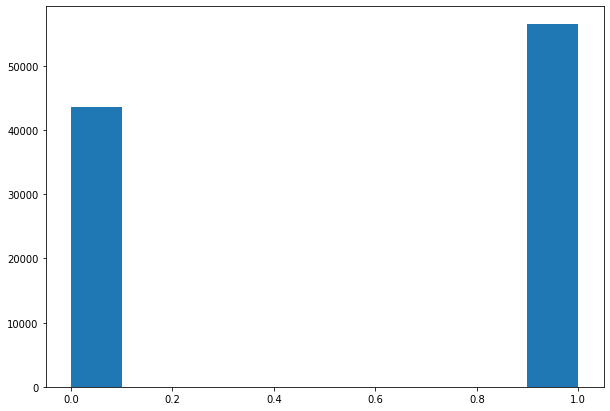

In [13]:
from matplotlib import pyplot as plt
fig, graph = plt.subplots(figsize =(10, 7))
graph.hist(df['label'])
plt.show()

In [14]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import re


In [21]:
    
max_fatures = 2500
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['tweet'].values)
X = tokenizer.texts_to_sequences(df['tweet'].values)
X = pad_sequences(X)
X[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   10,
          17,  124,    9,    8,  274],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,

In [22]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 104, 128)          320000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 104, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 196)               254800    
                                                                 
 dense_1 (Dense)             (None, 2)                 394       
                                                                 
Total params: 575,194
Trainable params: 575,194
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
Y = pd.get_dummies(df['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(79991, 104) (79991, 2)
(19998, 104) (19998, 2)


In [24]:
batch_size = 2048
model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1)

Epoch 1/15
40/40 [==============================] - 24s 544ms/step - loss: 0.6265 - accuracy: 0.6330
Epoch 2/15
40/40 [==============================] - 22s 545ms/step - loss: 0.5033 - accuracy: 0.7550
Epoch 3/15
40/40 [==============================] - 24s 601ms/step - loss: 0.4774 - accuracy: 0.7722
Epoch 4/15
40/40 [==============================] - 22s 546ms/step - loss: 0.4696 - accuracy: 0.7764
Epoch 5/15
40/40 [==============================] - 22s 545ms/step - loss: 0.4638 - accuracy: 0.7797
Epoch 6/15
40/40 [==============================] - 22s 547ms/step - loss: 0.4585 - accuracy: 0.7810
Epoch 7/15
40/40 [==============================] - 22s 541ms/step - loss: 0.4532 - accuracy: 0.7850
Epoch 8/15
40/40 [==============================] - 23s 569ms/step - loss: 0.4487 - accuracy: 0.7885
Epoch 9/15
40/40 [==============================] - 24s 595ms/step - loss: 0.4444 - accuracy: 0.7906
Epoch 10/15
40/40 [==============================] - 22s 548ms/step - loss: 0.4407 - accura

In [25]:
predict_x=model.predict(X_test) 
Y_pred=np.argmax(predict_x,axis=1)

In [26]:
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

confusion matrix [[6283 2467]
 [2225 9023]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      8750
           1       0.79      0.80      0.79     11248

    accuracy                           0.77     19998
   macro avg       0.76      0.76      0.76     19998
weighted avg       0.76      0.77      0.76     19998

